In [3]:
pip install pandas
pip install matplotlib

     |████████████████████████████████| 11.4 MB 4.7 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [2]:
# Import libraries
import pandas as pd
import numpy as np
import math
ds = pd.read_csv('data.csv') #as double array (csv)
r, c = ds.shape

In [110]:
#RUN THIS *ONCE* IF YOU WANT A MONTHLY SUMMARY RATHER THAN BY ARTICLE\
for row in range(r):
    ds.iat[row, 0] = math.floor(ds.iat[row, 0] / 100) #cut the last two digits

row = 1
for row in range(r): #for each row, unify text of all articles of the same month
    if(ds.iat[row, 0] == ds.iat[row - 1, 0]):
        ds.iat[row - 1, 1] += ("\n" + ds.iat[row, 1])
        ds.iat[row - 1, 2] += ("\n" + ds.iat[row, 2])
        ds.drop(row)
        r -= 1
    else:
        row += 1

In [3]:
#DATA BY CATEGORIES (in listed arrays):

covid = ["covid", "covid19", "covid-19", "covid 19", "coronavirus", "corona-virus"
        "pandemic", "quarantine", "spread", "distancing", "antibodies", "vaccine"
        "sars-Ccov-2", "face covering", "mask", "pfiser", "moderna", "virus", "disinfectant", "lockdown"]

symptoms = ["anosmia", "fever" ,"chills", "cough", "breath", "breathing", "fatigue",
           "muscle", "body", "ache", "headache", "taste", "smell", "sore", "throat"
           "congestion", "nose", "nausea", "vomiting", "diarrhea", "pain"
           "pressure in the chest", "pale", "lips", "nail", "brain", "telehealth"]

recovery = ["office", "commute", "traffic", "reopen", "recovery", "revive", "work", "return", "permit", "commute", "HVAC", "lockdown"]

retail = ["cloths", "clothes", "cosmetics", "beauty", "retail", "store", "opening hour", "shopping", "newburry", "newbury"]

outdoors = ["booking", "flight", "train", "hotel", "shuttle", "bus", "subway", "camping", "campervan", "fishing", 
            "park", "zoo", "aquarium", "tourist", "attractions", "fenway", "boston common", "public park", "museum"
            "trail", "tour", "show", "bicycles", "accessories", "vacation", "resort", "congestion", "transportation", "economy", "economic", "recovery"]

categ_data = [covid, symptoms, recovery, retail, outdoors]
categ_data_lyrics = ["COVID", "SYMTOMS", "RECOVERY", "RETAIL", "OUTDOORS"]

In [4]:
def init_dict(keys):
    d = {}
    for i in keys:
        d[i] = 0 #will automatically append (int type)
    return d

In [5]:
def count_occurences(text, keys):
    split_text = text.split()
    counter = 0
    dicter = init_dict(keys)
    for key in keys:
        for word in split_text:
            if key == word:
                counter += 1
                dicter[key] += 1
    return counter, dicter #dicter = dictionary

In [6]:
dates = []
cat_data_count = []
row = 0
for row in range(r): #for each row
    date, text = ds.iat[row, 0], ds.iat[row, 2]
    dates.append(str(date)) #array of dates of articles
    data_count = []
    for categ in categ_data: #for each category 
        count_plus_dict = count_occurences(text, categ) #count keys ocurrences (format: (counter, hashmap))
        data_count.append(count_plus_dict) #insert in list
    cat_data_count.append(data_count) #per article

In [7]:
#TODO now:
#leave commenst for sake of code clarity
#graph the followings:
    #date based (x) multi-function occurence count
    #individual key count representation (y) based on key (y) within catergorical data array

In [8]:
def get_counts_from_dict(d):
    counts = np.zeros((len(d), len(categ_data)))
    i = 0
    for i in range(len(d)): #for each article
        j = 0
        for j in range(len(d[i])): #for each category analyzed
            counts[i][j] = d[i][j][0]
    return counts.T #transpose

[0, 4, 5, 11, 14, 19, 26, 42, 48, 58, 71, 82, 83, 85, 89, 105] 121
[202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009, 202010, 202011, 202012, 202101, 202102, 202103, 202104, 202105]


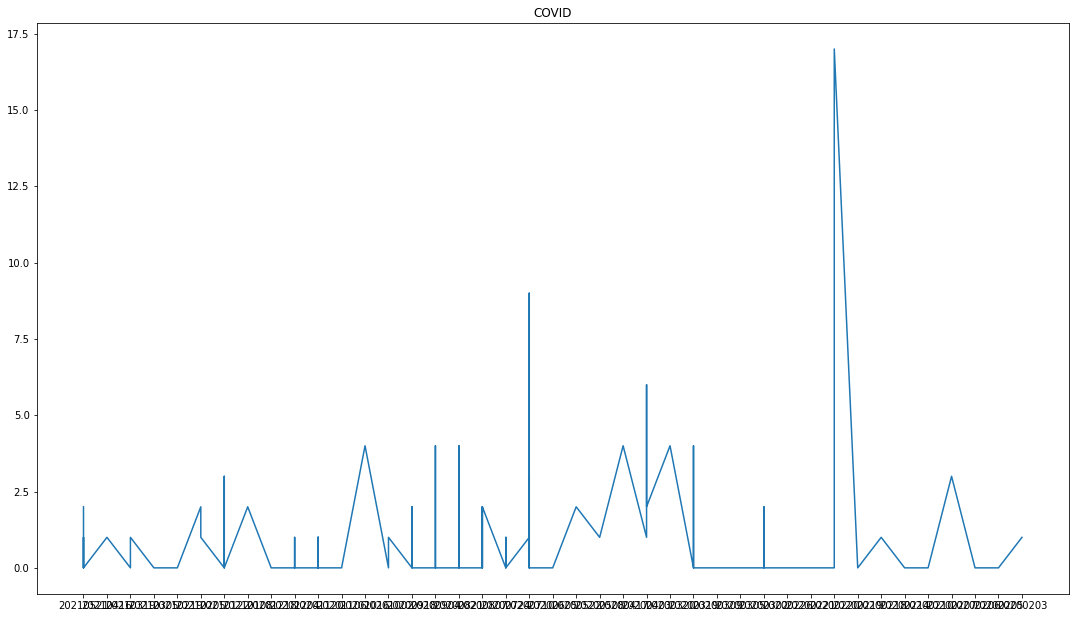

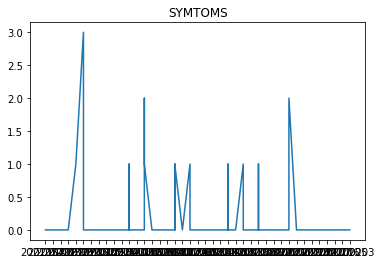

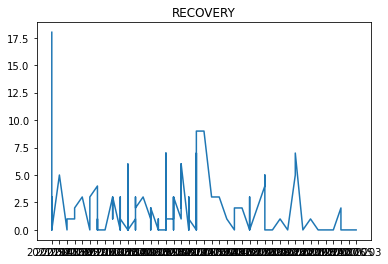

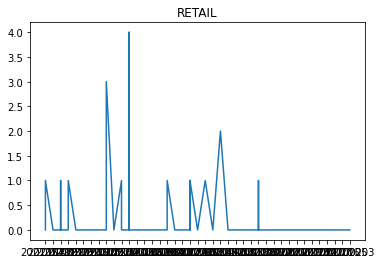

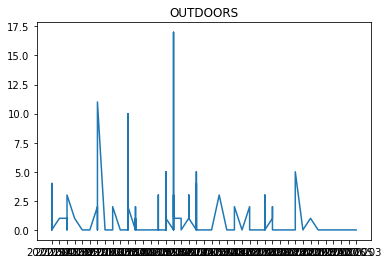

In [9]:
month_dates = []
for row in range(r):
    month_dates.append(math.floor(ds.iat[row, 0] / 100)) #cut the last two digits

month_dates_unique = set(month_dates)
fmdus = []
for i in month_dates_unique:
    fmdus.append(i)

#get indexes where new monthly dates appear
ugis = [0] #unique graph indices
for row in range(r - 1):
    if(math.floor(ds.iat[row, 0] / 100) != math.floor(ds.iat[row + 1, 0] / 100)):
        ugis.append(row)
print(ugis, len(dates))
        
fmdus.sort()
print(fmdus)
import matplotlib.pyplot as plt
x = dates
ys = get_counts_from_dict(cat_data_count)
count = 0
totaly = 0
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
for y in ys:
    plt.plot(x, y)
    totaly += y
    plt.title(categ_data_lyrics[count])
#     plt.xticks(ugis, month_dates_unique)
    plt.show()
    count += 1
        
        
# plt.xlabel("Pandemic Duration Dates")
# plt.ylabel("Key Words Count")
# plt.title("Pandemic Key Words Count Per Time")
# plt.show()

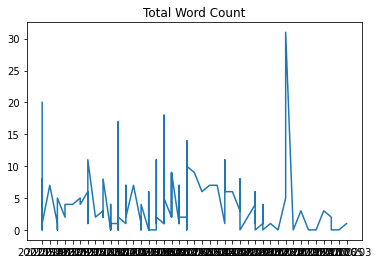

In [10]:
#TOTAL WORD COUNT OF ALL CATEGORIES
plt.plot(x, totaly)
plt.title("Total Word Count")
plt.show()

In [13]:
#for each category:
    # get all hashmaps per article
    # add all words for general hasmap
    # print hashmap out without zeroes
    
#cat_data_count is a list of elements (length = number of articles)
    #each element is a list of items (length = number of categories)
        #each item is a tuple (length = 2)
            #each tuple contains:
            # 1) count of words from the categorical word bank
            # 2) hashmap (dictionary) of occurences per word in that categorical word bank
       
#DEFINE: function to add one hashmap of the same structure to a master hm
def add_hm_to_master(hms, mini, categ):
    master = hms[categ]
    for i in range(len(mini)):
        master[i][1] += mini[i][1]
    hms[categ] = master
        
        
    
#TODO:
    #ignore commas, period, etc. when analysing words
    #mord graphics
    #bigger sized graphs (wider)
            
#begin by initiating 5 empty dictionaries/HMs
hms = []
for categ in categ_data:
    d = []
    for word in categ:
        t = (word, 0)
        d.append(t)
    hms.append(d) #add the empty hm to the list of empty hms
    
#now we have 5 empty dictionaries
e = 0
for e in range(len(cat_data_count)): #per article
    i = 0
    for i in range(len(cat_data_count[0])): #since there are 5 categories
        hm = cat_data_count[e][i][1] #access the hashmap, second[1] element in the hashmap located at [e][i]
        hms = add_hm_to_master(hms, hm, i)

KeyError: 0